### 1. Loading The Row Dataset

In [111]:
train_data_path = "../data/row_data/Synthetic-Persona-Chat_train.csv"
test_data_path = "../data/row_data/Synthetic-Persona-Chat_test.csv"
validation_data_path = "../data/row_data/Synthetic-Persona-Chat_valid.csv"

train_data_path_processed = "../data/processed_data/train.pkl"
test_data_path_processed = "../data/processed_data/test.pkl"   
validation_data_path_processed = "../data/processed_data/valid.pkl"

#### 1.1. Loading Training Data

In [112]:
import pandas as pd
# Replace 'your_file.csv' with the path to your file
df = pd.read_csv(test_data_path)
# Display the first few rows of the dfframe
print(df.head())

                                     user 1 personas  \
0  I just bought a brand new house.\nI like to da...   
1  I am an old man.\nI have a wheelchair that is ...   
2  I met my best friend in kindergarten.\nI am of...   
3  I love having facial hair.\nI hope to retire s...   
4  I love watching movies and tv.\nI have a husba...   

                                     user 2 personas  \
0  I love to meet new people.\nI have a turtle na...   
1  I drive a ford pickup truck.\nI am very conser...   
2  I have two dogs and one cat.\nI work as a nurs...   
3  I am happy being single and alone.\nI only dri...   
4  I am afraid of heights.\nI love animals and ha...   

                         Best Generated Conversation  
0  User 1: Hi, I'm [User 1's name]. What's your n...  
1  User 1: Hi there!\nUser 2: Hello.\nUser 1: I'm...  
2  User 1: Hi! What do you do for work?\nUser 2: ...  
3  User 1: How are you doing today?\nUser 2: I'm ...  
4  User 1: Hi there!\nUser 2: Hi there!\nUser 1: ..

#### 1.2 Converting the data Into List of Lists

In [113]:
data_list = df.to_dict(orient='records')
data_list[0:5]

[{'user 1 personas': 'I just bought a brand new house.\nI like to dance at the club.\nI run a dog obedience school.\nI have a big sweet tooth.\nI like taking and posting selkies.',
  'user 2 personas': 'I love to meet new people.\nI have a turtle named timothy.\nMy favorite sport is ultimate frisbee.\nMy parents are living in bora bora.\nAutumn is my favorite season.',
  'Best Generated Conversation': "User 1: Hi, I'm [User 1's name]. What's your name?\nUser 2: Hi, I'm [User 2's name]. It's nice to meet you.\nUser 1: Nice to meet you too. What are you interested in?\nUser 2: I like to meet new people, play ultimate frisbee, and spend time with my family.\nUser 1: Those are all great things to be interested in. I like to dance at the club, run a dog obedience school, and eat a lot of sweets.\nUser 2: That's interesting. I've never met anyone who runs a dog obedience school before.\nUser 1: It's a lot of fun. I get to work with dogs every day and help them learn how to behave.\nUser 2: T

#### 1.3 Extructiong Only Model Personality and Conversation

In [114]:
data_list = [{"persona":instance["user 1 personas"],"conversation":instance["Best Generated Conversation"]} for instance in data_list]

In [115]:
data_list[0:5]

[{'persona': 'I just bought a brand new house.\nI like to dance at the club.\nI run a dog obedience school.\nI have a big sweet tooth.\nI like taking and posting selkies.',
  'conversation': "User 1: Hi, I'm [User 1's name]. What's your name?\nUser 2: Hi, I'm [User 2's name]. It's nice to meet you.\nUser 1: Nice to meet you too. What are you interested in?\nUser 2: I like to meet new people, play ultimate frisbee, and spend time with my family.\nUser 1: Those are all great things to be interested in. I like to dance at the club, run a dog obedience school, and eat a lot of sweets.\nUser 2: That's interesting. I've never met anyone who runs a dog obedience school before.\nUser 1: It's a lot of fun. I get to work with dogs every day and help them learn how to behave.\nUser 2: That sounds like a great job. I love dogs.\nUser 1: Me too! They're the best.\nUser 2: I have a turtle named Timothy. He's my best friend.\nUser 1: I love turtles! I used to have a turtle when I was a kid.\nUser 2: 

#### 1.4 Converting the Data Into Structured Data

In [116]:
for i, instance in enumerate(data_list):
    try:
        instance["persona"] = instance["persona"].split("\n")
        instance["conversation"] = instance["conversation"].split("\n")
        instance["persona"] = [p.strip() for p in instance["persona"] if p.strip()]
        instance["conversation"] = [c.strip() for c in instance["conversation"] if c.strip()]

        instance["conversation"] = [c.replace("User 1:", "user") for c in instance["conversation"]]
        instance["conversation"] = [c.replace("User 2:", "persona").strip() for c in instance["conversation"]]
    except Exception as e:
        print("Error in instance:", instance)
        print("Error in instance index:", i)
        print("Exception:", e)
        continue

Error in instance: {'persona': ['I love playing video games.', 'Hey there my name is jordan and i am a veterinarian.', 'I am also a musician on the weekends.', 'Love to read drama books.'], 'conversation': nan}
Error in instance index: 510
Exception: 'float' object has no attribute 'split'


#### Cleaning the Data

In [117]:
## Only For Test.csv
print(data_list[510])
data_list.pop(510)

{'persona': ['I love playing video games.', 'Hey there my name is jordan and i am a veterinarian.', 'I am also a musician on the weekends.', 'Love to read drama books.'], 'conversation': nan}


{'persona': ['I love playing video games.',
  'Hey there my name is jordan and i am a veterinarian.',
  'I am also a musician on the weekends.',
  'Love to read drama books.'],
 'conversation': nan}

In [118]:
print("Personality:")
print("-" * 20)
for persona in data_list[0]["persona"]:
    print(persona)

print("\nConversation:")
print("-" * 20)
for conversation in data_list[0]["conversation"]:
    print(conversation)


Personality:
--------------------
I just bought a brand new house.
I like to dance at the club.
I run a dog obedience school.
I have a big sweet tooth.
I like taking and posting selkies.

Conversation:
--------------------
user Hi, I'm [User 1's name]. What's your name?
persona Hi, I'm [User 2's name]. It's nice to meet you.
user Nice to meet you too. What are you interested in?
persona I like to meet new people, play ultimate frisbee, and spend time with my family.
user Those are all great things to be interested in. I like to dance at the club, run a dog obedience school, and eat a lot of sweets.
persona That's interesting. I've never met anyone who runs a dog obedience school before.
user It's a lot of fun. I get to work with dogs every day and help them learn how to behave.
persona That sounds like a great job. I love dogs.
user Me too! They're the best.
persona I have a turtle named Timothy. He's my best friend.
user I love turtles! I used to have a turtle when I was a kid.
person

#### 1.5 Changing the User And Assistant Names

In [119]:
found = []
bot_Name  = "College Buddy"
user_name = "User"

for i, data in enumerate(data_list):
    conversation = data["conversation"]
    persona = data["persona"]
    
    for j, utterance in enumerate(conversation):
        # Check if both names are in the same utterance
        if "[user 1's name]" in utterance and "[user 2's name]" in utterance:
            # print("Found both '[user 1's name]' and '[user 2's name]' in utterance:", utterance)
            # Replace both names
            updated_utterance = utterance.replace("[user 1's name]", user_name).replace("[user 2's name]", bot_Name)
            # Update the conversation with the new utterance
            data_list[i]["conversation"][j] = updated_utterance
            found.append({"i": i, "j": j, "utterance": updated_utterance})
        
        # Check and replace only [user 1's name]
        elif "[user 1's name]" in utterance:
            # print("Found [user 1's name] in utterance:", utterance)
            # Replace with "Rahul Bharti"
            updated_utterance = utterance.replace("[user 1's name]", user_name)
            # Update the conversation with the new utterance
            data_list[i]["conversation"][j] = updated_utterance
            found.append({"i": i, "j": j, "utterance": updated_utterance})
        
        # Check and replace only [user 2's name]
        elif "[user 2's name]" in utterance:
            # print("Found [user 2's name] in utterance:", utterance)
            # Replace with "Siddharth Bharti"
            updated_utterance = utterance.replace("[user 2's name]", bot_Name)
            # Update the conversation with the new utterance
            data_list[i]["conversation"][j] = updated_utterance
            found.append({"i": i, "j": j, "utterance": updated_utterance})

# After the loop, `data_list` will be updated with the modified utterances
# and `found` will contain the changes.


### 2. Converting Words to Tokens

#### 2.1 Loading the bart Tokenizer

In [120]:
from transformers import BartTokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
add_special_tokens = {'additional_special_tokens': ['<query>', '<response>', '<latent>', '<persona>']}
tokenizer.add_special_tokens(add_special_tokens)

4

#### 2.2 Added Special Tokens

In [121]:
args = {}
encoded_tokens = tokenizer.encode(add_special_tokens['additional_special_tokens'])
args['bos'], args["query"], args["response"], args["latent"], args["persona"], args["eos"] = encoded_tokens
args["pad"] = 1

####  2.3 Converting the Data Into Tokens

In [122]:
from tqdm.auto import tqdm
data_ids = [
    {
        "persona":[tokenizer.encode(persona) for persona in instance['persona']],
        "conversation":[tokenizer.encode(utterance) for utterance in instance['conversation']]
    }
    
    for instance in tqdm(data_list,desc="Processing data")
]

Processing data: 100%|██████████| 967/967 [00:10<00:00, 90.05it/s] 


In [123]:
data_ids[0]

{'persona': [[0, 100, 95, 2162, 10, 1518, 92, 790, 4, 2],
  [0, 100, 101, 7, 3836, 23, 5, 950, 4, 2],
  [0, 100, 422, 10, 2335, 41227, 334, 4, 2],
  [0, 100, 33, 10, 380, 4045, 13495, 4, 2],
  [0, 100, 101, 602, 8, 6016, 842, 462, 16731, 4, 2]],
 'conversation': [[0,
   12105,
   12289,
   6,
   38,
   437,
   646,
   44518,
   112,
   18,
   766,
   8174,
   653,
   18,
   110,
   766,
   116,
   2],
  [0,
   5970,
   102,
   12289,
   6,
   38,
   437,
   646,
   44518,
   132,
   18,
   766,
   8174,
   85,
   18,
   2579,
   7,
   972,
   47,
   4,
   2],
  [0, 12105, 16911, 7, 972, 47, 350, 4, 653, 32, 47, 2509, 11, 116, 2],
  [0,
   5970,
   102,
   38,
   101,
   7,
   972,
   92,
   82,
   6,
   310,
   7017,
   6664,
   354,
   14650,
   6,
   8,
   1930,
   86,
   19,
   127,
   284,
   4,
   2],
  [0,
   12105,
   2246,
   32,
   70,
   372,
   383,
   7,
   28,
   2509,
   11,
   4,
   38,
   101,
   7,
   3836,
   23,
   5,
   950,
   6,
   422,
   10,
   2335,
   41227,
 

In [124]:
tokenizer.decode(data_ids[0]["persona"][0])

'<s>I just bought a brand new house.</s>'

In [125]:
tokenizer.decode(data_ids[0]["conversation"][0])

"<s>user Hi, I'm [User 1's name]. What's your name?</s>"

#### 2.4 Adder Query and Response Tokens

In [126]:
for dat in data_ids:
    for i, utter in enumerate(dat['conversation']):
        if i % 2 == 0:
            dat['conversation'][i] = [args["query"]] + utter
        else:
            dat['conversation'][i] = [args["response"]] + utter


In [127]:
for dat in data_ids[0]['conversation']:
    print(tokenizer.decode(dat))

<query> <s>user Hi, I'm [User 1's name]. What's your name?</s>
<response> <s>persona Hi, I'm [User 2's name]. It's nice to meet you.</s>
<query> <s>user Nice to meet you too. What are you interested in?</s>
<response> <s>persona I like to meet new people, play ultimate frisbee, and spend time with my family.</s>
<query> <s>user Those are all great things to be interested in. I like to dance at the club, run a dog obedience school, and eat a lot of sweets.</s>
<response> <s>persona That's interesting. I've never met anyone who runs a dog obedience school before.</s>
<query> <s>user It's a lot of fun. I get to work with dogs every day and help them learn how to behave.</s>
<response> <s>persona That sounds like a great job. I love dogs.</s>
<query> <s>user Me too! They're the best.</s>
<response> <s>persona I have a turtle named Timothy. He's my best friend.</s>
<query> <s>user I love turtles! I used to have a turtle when I was a kid.</s>
<response> <s>persona That's awesome. What was it

### 3. Data Structiong with Fixed window Size

In [128]:
def get_history_windows(data, window_size=5):
    history_windows = []
    labels = []
    for i in range(len(data) - 1):
        if data[i][0] == args["query"]:
            window = []
            # add the query itself first
            window.append(data[i])

            # move backwards and collect previous turns (up to window_size)
            j = i - 1
            while j >= 0 and len(window) < window_size:
                window.insert(0, data[j])
                j -= 1
            
            history_windows.append(window)
            labels.append(data[i + 1])

    return history_windows,labels

In [129]:
window_size = 5
history_windows, labels = get_history_windows(data_ids[0]['conversation'], window_size=window_size)

#### Data Structure
[latent][personality][query][response] 

In [130]:
from itertools import chain

train_data = []

for instance in data_ids:
    history_windows, labels = get_history_windows(instance['conversation'],window_size=5)

    for window, label in zip(history_windows, labels):
        train_data.append({
            "input_ids": [args["latent"], args["persona"]] 
                          + list(chain.from_iterable(instance['persona'])) 
                          + list(chain.from_iterable(window)),
            "labels": label
        })


Input IDs - Avg: 120.30000763184003 Min: 35 Max: 339
Labels     - Avg: 16.93703731969778 Min: 4 Max: 88


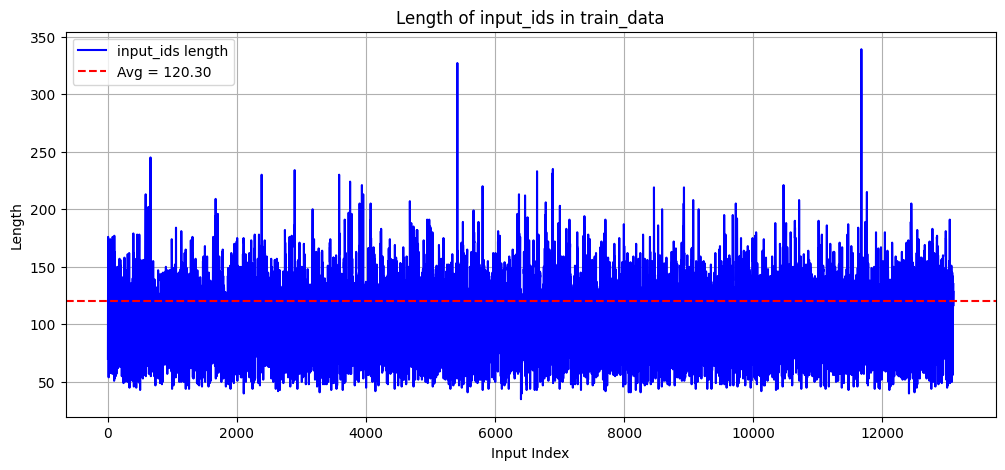

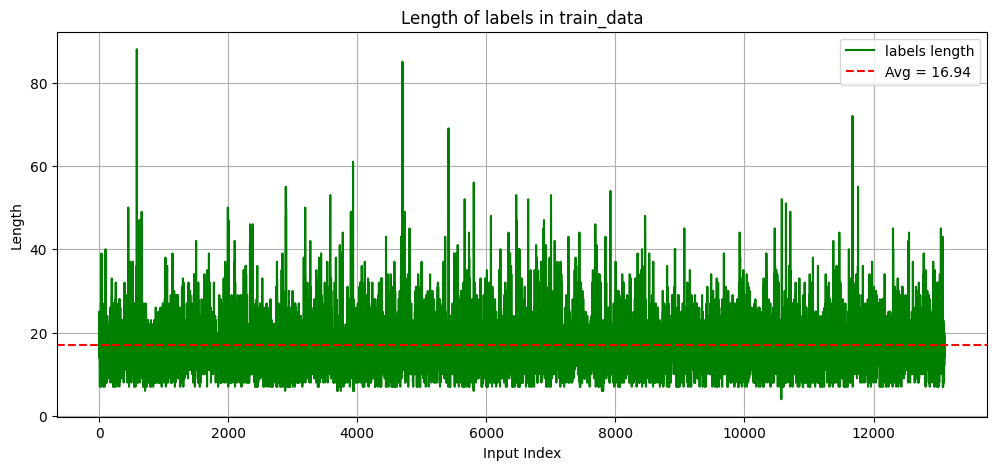

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Extract lengths
input_lengths = [len(entry["input_ids"]) for entry in train_data]
label_lengths = [len(entry["labels"]) for entry in train_data]

# Calculate stats
input_avg = np.mean(input_lengths)
input_min = np.min(input_lengths)
input_max = np.max(input_lengths)

label_avg = np.mean(label_lengths)
label_min = np.min(label_lengths)
label_max = np.max(label_lengths)

# Print statistics
print("Input IDs - Avg:", input_avg, "Min:", input_min, "Max:", input_max)
print("Labels     - Avg:", label_avg, "Min:", label_min, "Max:", label_max)

# Plot input_ids lengths
plt.figure(figsize=(12, 5))
plt.plot(input_lengths, color='blue', label="input_ids length")
plt.axhline(input_avg, color='red', linestyle='--', label=f'Avg = {input_avg:.2f}')
plt.xlabel("Input Index")
plt.ylabel("Length")
plt.title("Length of input_ids in train_data")
plt.legend()
plt.grid(True)
plt.show()

# Plot labels lengths
plt.figure(figsize=(12, 5))
plt.plot(label_lengths, color='green', label="labels length")
plt.axhline(label_avg, color='red', linestyle='--', label=f'Avg = {label_avg:.2f}')
plt.xlabel("Input Index")
plt.ylabel("Length")
plt.title("Length of labels in train_data")
plt.legend()
plt.grid(True)
plt.show()


### 4 saving the Processed Data

In [132]:
# train_data_path_processed = "../data/processed_data/train.pkl"
# test_data_path_processed = "../data/processed_data/test.csv"   
# validation_data_path_processed = "../data/processed_data/valid.csv"
import pickle
with open(test_data_path_processed, 'wb') as f_val:
    pickle.dump(train_data, f_val)